In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/clean_choco_rating_dataset.csv')

In [3]:
data.head()

,choco_bar_name,company_name,company_loc,rating,cocoa_perc,CQ,sweetness,acidity,bitterness,roast,intensity,complexity,structure,length,appearance,aroma,mouthfeel,flavor,quality
0,Nib Brittle,Theo,USA,2.5,65.0,57.0,55.0,48.0,37.0,62.0,51.0,43.0,41.0,29.0,74.0,72.0,72.0,81.4,83.0
1,Ivory Coast,Theo,USA,4.0,75.0,53.0,42.0,40.0,49.0,71.0,37.0,36.0,80.0,82.0,92.0,82.0,85.3,88.4,86.5
2,Ghana-Panama-Ecuador,Theo,USA,3.5,75.0,44.0,48.0,76.0,50.0,63.0,45.0,52.0,39.0,81.0,100.0,80.0,82.0,86.4,87.0
3,Mad 65,Theo,USA,4.0,65.0,60.0,56.0,76.0,20.0,68.0,64.0,62.0,83.0,51.0,100.0,73.0,90.7,89.0,90.0
4,85% Blend,Venchi,Italy,3.5,85.0,23.0,21.0,8.0,70.0,76.0,52.0,10.0,78.0,69.0,92.0,84.0,83.3,84.2,82.5


In [4]:
#only get what you need
df = data.loc[:,'rating':]
df.head()

,rating,cocoa_perc,CQ,sweetness,acidity,bitterness,roast,intensity,complexity,structure,length,appearance,aroma,mouthfeel,flavor,quality
0,2.5,65.0,57.0,55.0,48.0,37.0,62.0,51.0,43.0,41.0,29.0,74.0,72.0,72.0,81.4,83.0
1,4.0,75.0,53.0,42.0,40.0,49.0,71.0,37.0,36.0,80.0,82.0,92.0,82.0,85.3,88.4,86.5
2,3.5,75.0,44.0,48.0,76.0,50.0,63.0,45.0,52.0,39.0,81.0,100.0,80.0,82.0,86.4,87.0
3,4.0,65.0,60.0,56.0,76.0,20.0,68.0,64.0,62.0,83.0,51.0,100.0,73.0,90.7,89.0,90.0
4,3.5,85.0,23.0,21.0,8.0,70.0,76.0,52.0,10.0,78.0,69.0,92.0,84.0,83.3,84.2,82.5


# Build a Baseline 

In [5]:
#baseline multi-linear regression model
df_Y = df['rating']
df_X = df.loc[:,'cocoa_perc':]

regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, df_X, df_Y, scoring='r2', cv=crossvalidation))
baseline

0.8341048608039572

In [6]:
import statsmodels.api as sm
df_sm = sm.add_constant(df_X)
results = sm.OLS(df_Y, df_sm).fit()
results.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     496.0
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:41:24   Log-Likelihood:                -856.98
No. Observations:                1367   AIC:                             1746.
Df Residuals:                    1351   BIC:                             1829.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8140      0.184    -26.163      0.000      -5.175      -4.453
cocoa_perc     0.0008      0.001      0.691      0.490      -0.001       0.003
CQ             0.0022      0.001      3.062      0.002       0.001       0.004
sweetness      0.0019      0.001      1.982      0.048    2.01e-05       0.004
acidity        0.0002      0.001      0.220      0.826      -0.001       0.002
bitterness   5.92e-05      0.001      0.066      0.947      -0.002       0.002
roast         -0.0009      0.001     -1.094      0.274      -0.002       0.001
intensity     -0.0008      0.001     -0.928      0.354      -0.002       0.001
complexity     0.0052      0.001      6.055      0.000       0.004       0.007
structure      0.0082      0.001      9.083      0.000       0.006       0.010
length        -0.0007      0.001     -0.647      0.518      -0.003       0.001
appearance     0.0054      0.001      5.587      0.000       0.004       0.007
aroma          0.0131      0.001     10.486      0.000       0.011       0.016
mouthfeel      0.0176      0.001     11.983      0.000       0.015       0.020
flavor         0.0356      0.002     19.260      0.000       0.032       0.039
quality        0.0154      0.001     10.918      0.000       0.013       0.018
==============================================================================
Omnibus:                      996.949   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            88252.063
Skew:                          -2.642   Prob(JB):                         0.00
Kurtosis:                      42.006   Cond. No.                     3.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Find Interactions

It should be noted that the variables in my chart is already scaled because every variable is a score from 0 to 100 with exception of the target variable, rating which is from 0 to 5.

In [7]:
#look at the r^2 of all the combinations
from itertools import combinations

#create list of 2 column combinations
combinations = list(combinations(df_X.columns, 2))

#get the r^2 of each combination
interactions = []
X_copy = df_X.copy()
for col1, col2 in combinations:
    X_copy['interaction'] = X_copy[col1] * X_copy[col2]
    #use the same regression and crossvalidation
    baseline = np.mean(cross_val_score(regression, df_X, df_Y, scoring='r2', cv=crossvalidation))
    #add new tuple with r^2 to list
    interactions.append((col1, col2, baseline))
#sort by highest r^2
interactions = sorted(interactions, key=lambda tup: tup[2], reverse=True)
interactions[:5] #ummm.... they all look the same

#scratch this idea

[('cocoa_perc', 'CQ', 0.8341048608039572),
 ('cocoa_perc', 'sweetness', 0.8341048608039572),
 ('cocoa_perc', 'acidity', 0.8341048608039572),
 ('cocoa_perc', 'bitterness', 0.8341048608039572),
 ('cocoa_perc', 'roast', 0.8341048608039572)]

### lets start with a correlation map

In [8]:
#make config file
from config import plotly_username, plotly_api_key
import plotly 
plotly.tools.set_credentials_file(username=plotly_username, api_key=plotly_api_key)

import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go

In [10]:
#correlation heatmap of variables
corrs = df_X.corr()
colorscale=[[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], [0.2222222222222222, 'rgb(244,109,67)'], [0.3333333333333333, 'rgb(253,174,97)'], [0.4444444444444444, 'rgb(254,224,144)'], [0.5555555555555556, 'rgb(224,243,248)'], [0.6666666666666666, 'rgb(171,217,233)'], [0.7777777777777778, 'rgb(116,173,209)'], [0.8888888888888888, 'rgb(69,117,180)'], [1.0, 'rgb(49,54,149)']]
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True,
    colorscale=colorscale)

py.iplot(figure)

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



cocoa_perc and sweetness is moderately negavitely correlated <br>
sweetness and bitterness is moderately negatively correlated  <br>

cocoa_perc and bitterness is moderately positively correlated  <br>
complexity and flavor is is moderately positively correlated <br>
structure and complexity is moderately positively correlated <br>
structure and quality is moderately positively correlated <br>
flavor and quality is highly positively correlated  <br>

Look at the scatter matrix of the variables with high correlations, positive or negative



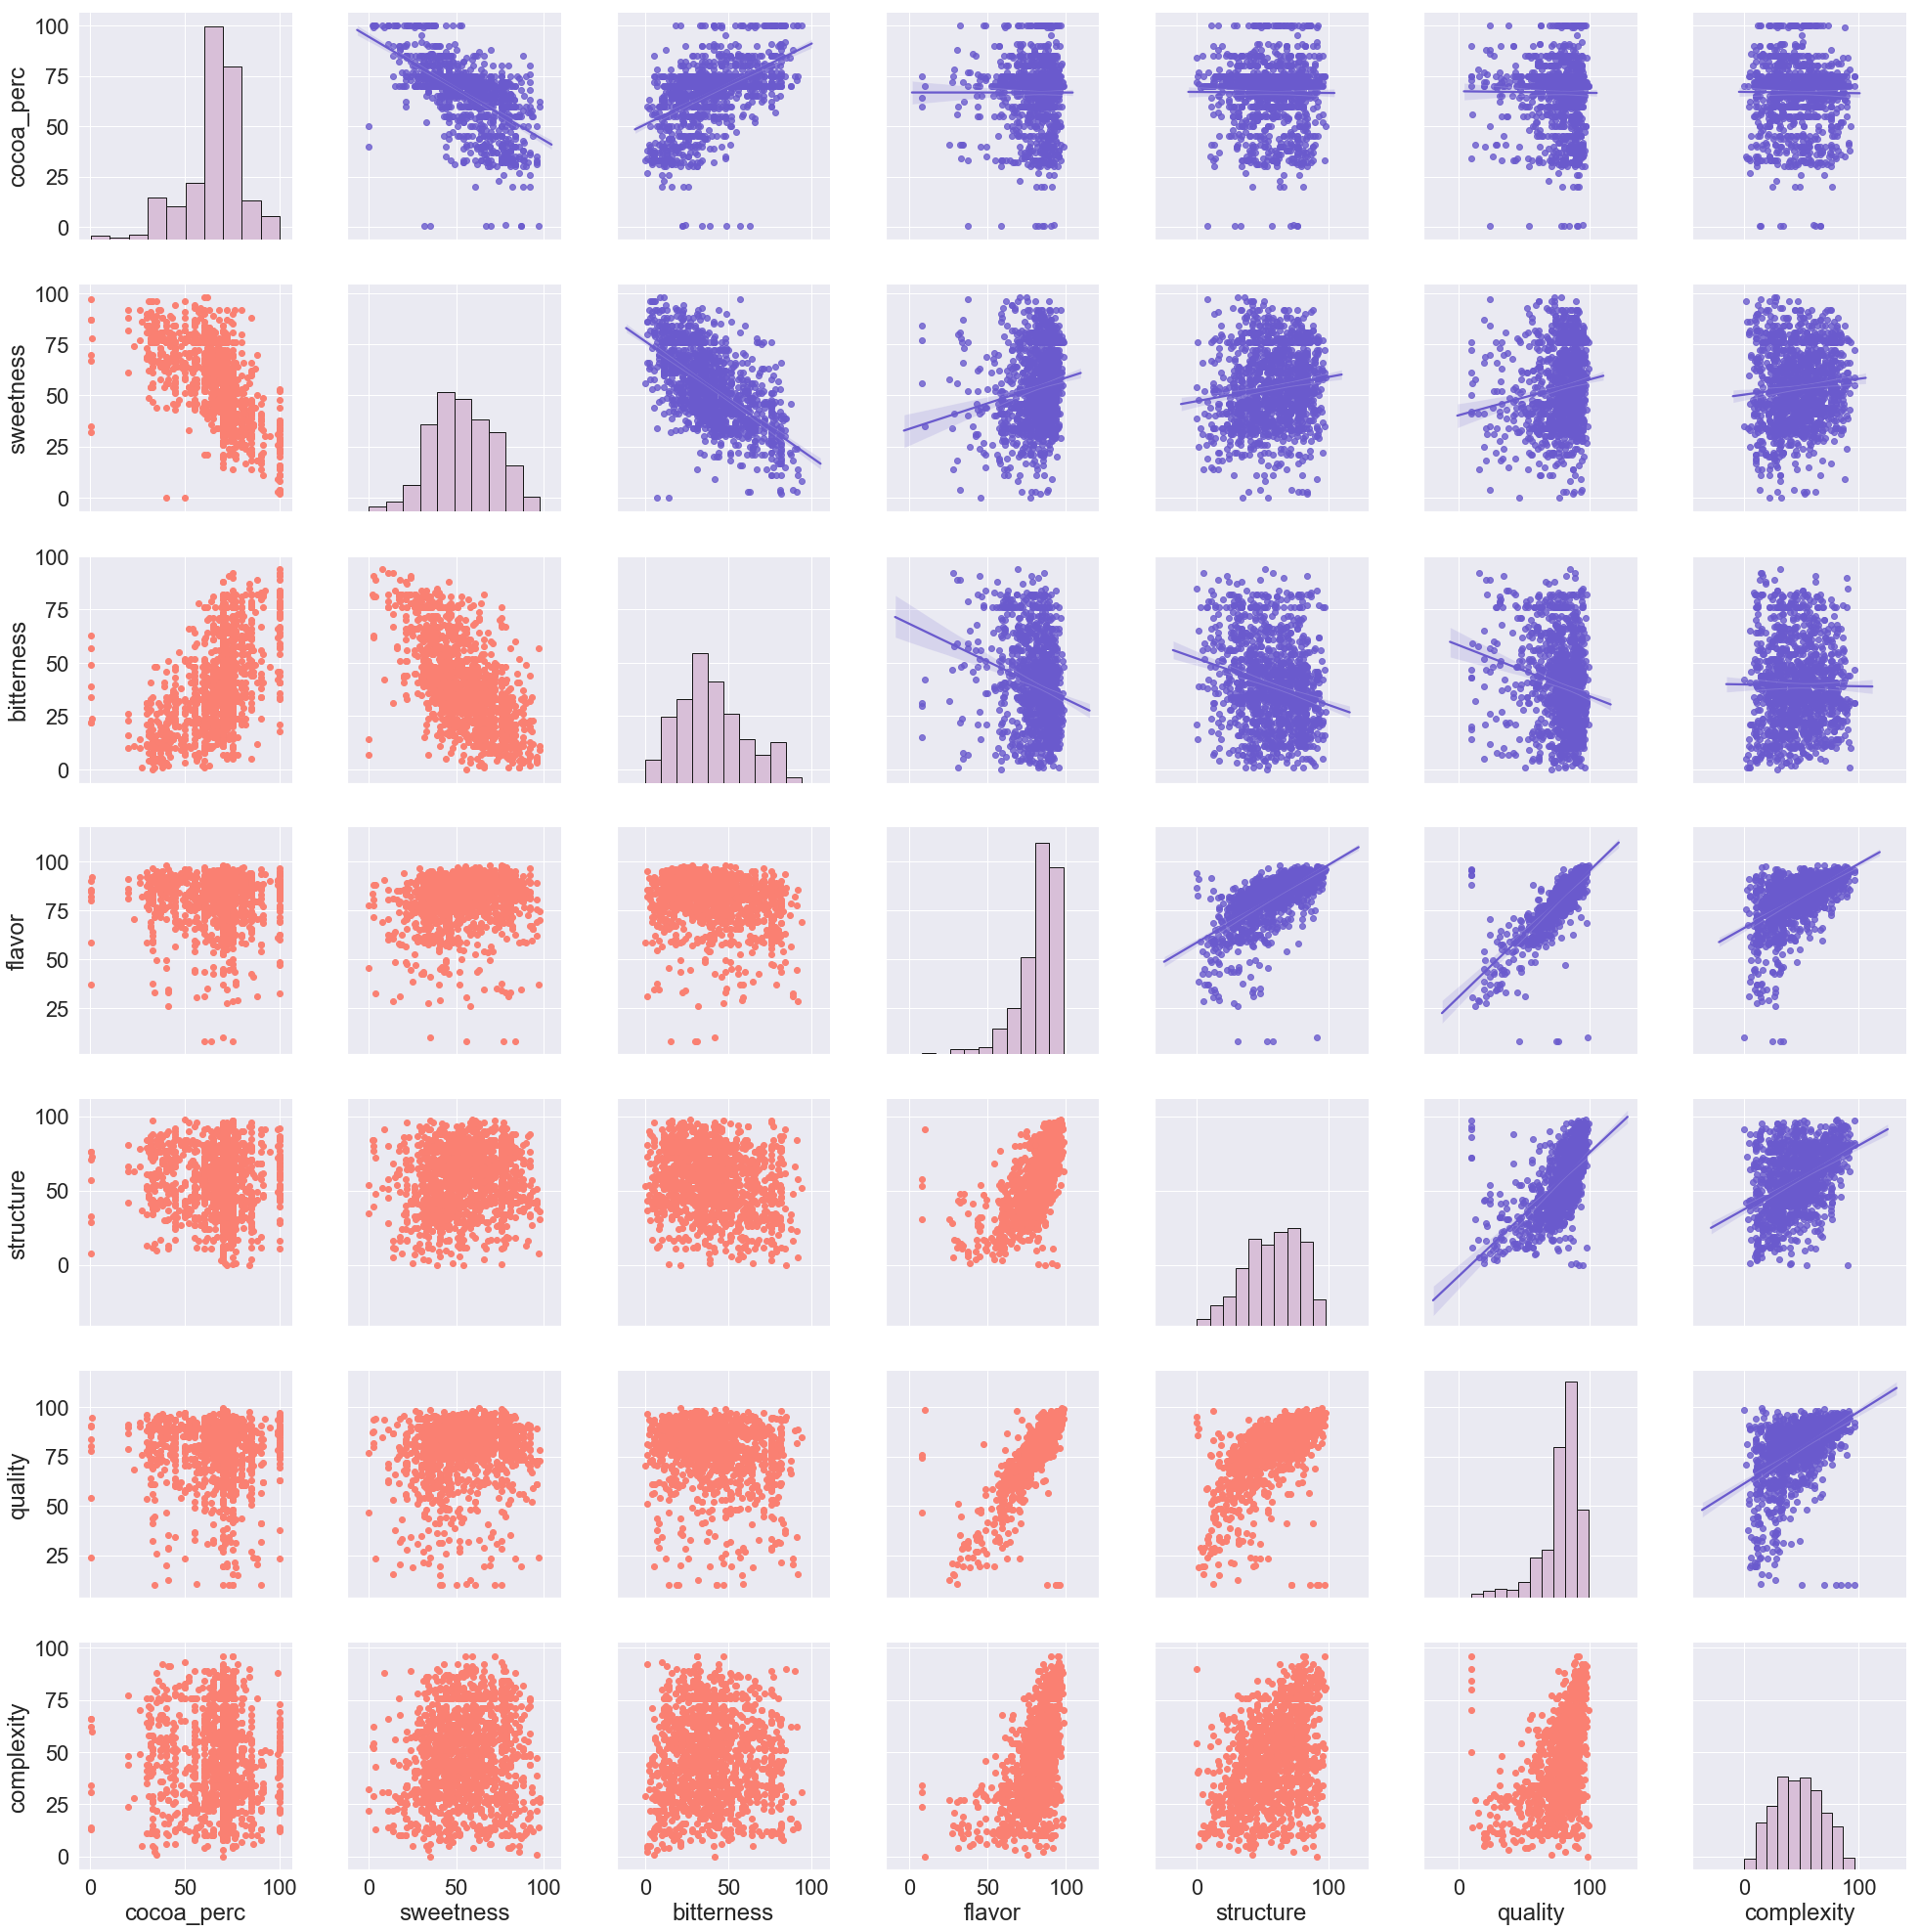

In [16]:
grid = sns.PairGrid(data=df_X[['cocoa_perc', 'sweetness', 'bitterness', 'flavor', 'structure', 'quality', 'complexity']],
                    height = 4)
sns.set(font_scale=2)
# Map the plots to the locations
grid = grid.map_lower(plt.scatter, color='salmon')
grid = grid.map_upper(sns.regplot, color='slateblue')
grid = grid.map_diag(plt.hist, bins=10, edgecolor='k', color='thistle');

Combinations that I would like to test based on this scatter matrix for being most linear out of the bunch
- flavor and quality <br>
- flavor and structure <br>
- flavor and complexity <br>
- structure and quality <br>

It should be noted that "The higher the percentage of cocoa, the more bitter the chocolate. This leads to want to test the interactions of: <br>
- cocoa_perc and sweetness <br>
- cocoa_perc and bitterness <br>
- sweetness and bitterness <br>




#### Look for Interactions

In [11]:
#seperate data
df.describe()

,rating,cocoa_perc,CQ,sweetness,acidity,bitterness,roast,intensity,complexity,structure,length,appearance,aroma,mouthfeel,flavor,quality
count,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000
mean,3.025604,66.778566,47.568032,54.076811,40.864667,39.490856,61.895757,59.254572,47.141185,57.787418,65.356986,83.073884,77.836869,80.153987,81.601756,78.592538
std,1.155737,15.302756,20.807441,18.168903,21.332616,19.752192,16.804587,18.123406,20.918089,20.871090,14.032847,13.459324,11.403957,10.211248,12.606001,15.502185
min,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,10.000000,27.300000,8.000000,10.000000
25%,2.500000,62.000000,32.000000,41.000000,24.000000,26.000000,53.000000,48.500000,31.000000,43.000000,56.000000,76.000000,72.000000,76.000000,76.800000,74.000000
50%,3.000000,70.000000,45.000000,52.000000,38.000000,37.000000,64.000000,61.000000,46.000000,60.000000,68.000000,86.000000,80.000000,81.300000,85.600000,82.000000
75%,4.000000,75.000000,63.000000,67.000000,54.000000,51.000000,76.000000,73.000000,62.000000,76.000000,76.000000,94.000000,86.000000,86.700000,90.000000,89.000000
max,5.000000,100.000000,96.000000,98.000000,98.000000,94.000000,99.000000,99.000000,96.000000,98.000000,99.000000,100.000000,98.000000,100.000000,98.200000,99.500000


In [12]:
#seperate the dataframe into 3 different dataframes of 33%,between 33% and 66%, and everything over
#based on a specified column
def create_bins(var_bin_name):
    #greater than the 67%
    df_high = df[df[var_bin_name] > np.percentile(df[var_bin_name], 67)]
    #between the 33% and 67%
    df_med = df[(df[var_bin_name] <= np.percentile(df[var_bin_name], 67)) & 
             (df[var_bin_name] > np.percentile(df[var_bin_name], 33))]
    #less than the 33%
    df_low = df[df[var_bin_name] <= np.percentile(df[var_bin_name], 33)]
    
    return df_high, df_med, df_low

In [13]:
#create an interaction model by portioning the dataframe based on a column and looking at the iteraction
#on a specified column
#takes in interaction column and sectioning column
def create_interaction(var_name, var_bin_name):
    #seperate the dataframe into 3 different dataframes of 33%,between 33% and 66%, and everything over
    df_high, df_med, df_low = create_bins(var_bin_name)
    print("df_high.shape: ", df_high.shape)
    print("df_med.shape: ",df_med.shape)
    print("df_low.shape: ",df_low.shape)
    
    #make regression line for seperate portions
    regression_h = LinearRegression()
    regression_m = LinearRegression()
    regression_l = LinearRegression()
    
    regression_h.fit(df_high[var_name].values.reshape(-1, 1), df_high['rating'])
    regression_m.fit(df_med[var_name].values.reshape(-1, 1), df_med['rating'])
    regression_l.fit(df_low[var_name].values.reshape(-1, 1), df_low['rating'])
    
    print("regression_h.coef_: ", regression_h.coef_) 
    print("regression_m.coef_: ", regression_m.coef_)
    print("regression_l.coef_: ", regression_l.coef_)

    #make predictions
    pred_h = regression_h.predict(df_high[var_name].values.reshape(-1, 1))
    pred_m = regression_m.predict(df_med[var_name].values.reshape(-1, 1))
    pred_l = regression_l.predict(df_low[var_name].values.reshape(-1, 1))
    
    #plot
    plt.figure(figsize=(15,8))
    plt.scatter(df_high[var_name], df_high['rating'], color='blue', alpha=0.3, label="bottom 33% in {}".format(var_bin_name))
    plt.scatter(df_med[var_name], df_med['rating'], color='orange', alpha=0.3, label="between 33% and 66% in {}".format(var_bin_name))
    plt.scatter(df_low[var_name], df_low['rating'], color='red', alpha=0.3, label="above 66% in {}".format(var_bin_name))
    #plot predicted lines
    plt.plot(df_high[var_name], pred_h, color='blue', lw=2)
    plt.plot(df_med[var_name], pred_m, color='orange', lw=2)
    plt.plot(df_low[var_name], pred_l, color='red', lw=2)
    
    
    plt.title('Interaction between {} and {}'.format(var_bin_name, var_name), fontsize=20)
    plt.ylabel('rating', fontsize=20)
    plt.yticks(fontsize=16)
    plt.xlabel(var_name, fontsize=20)
    plt.xticks(fontsize=16)
    plt.legend(prop={'size': 12})
    plt.show()

#### Test the Interactions

df_high.shape:  (403, 16)
df_med.shape:  (500, 16)
df_low.shape:  (464, 16)
regression_h.coef_:  [-0.01577551]
regression_m.coef_:  [-0.01963161]
regression_l.coef_:  [-0.00898228]


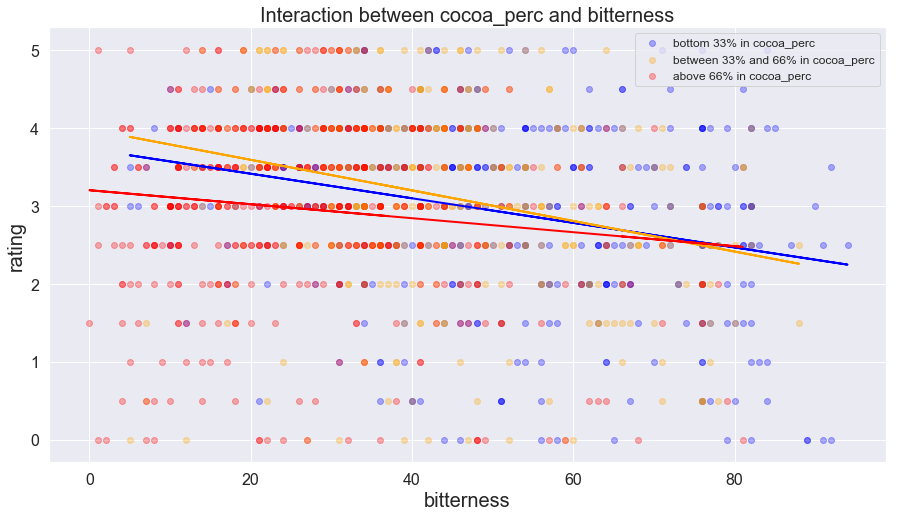

In [14]:
create_interaction('bitterness', 'cocoa_perc')

df_high.shape:  (403, 16)
df_med.shape:  (500, 16)
df_low.shape:  (464, 16)
regression_h.coef_:  [0.02018252]
regression_m.coef_:  [0.02455648]
regression_l.coef_:  [0.00618294]


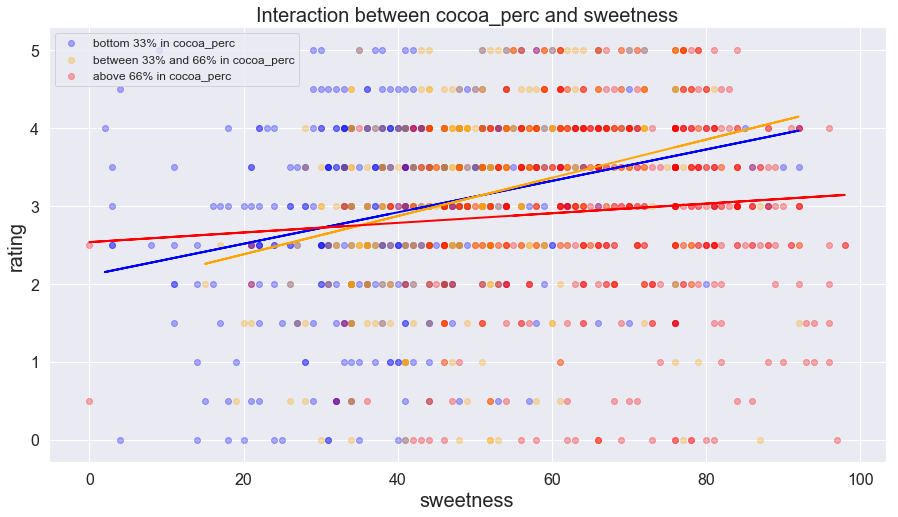

In [15]:
create_interaction('sweetness', 'cocoa_perc')

df_high.shape:  (431, 16)
df_med.shape:  (445, 16)
df_low.shape:  (491, 16)
regression_h.coef_:  [0.01098573]
regression_m.coef_:  [0.01071508]
regression_l.coef_:  [-0.00313808]


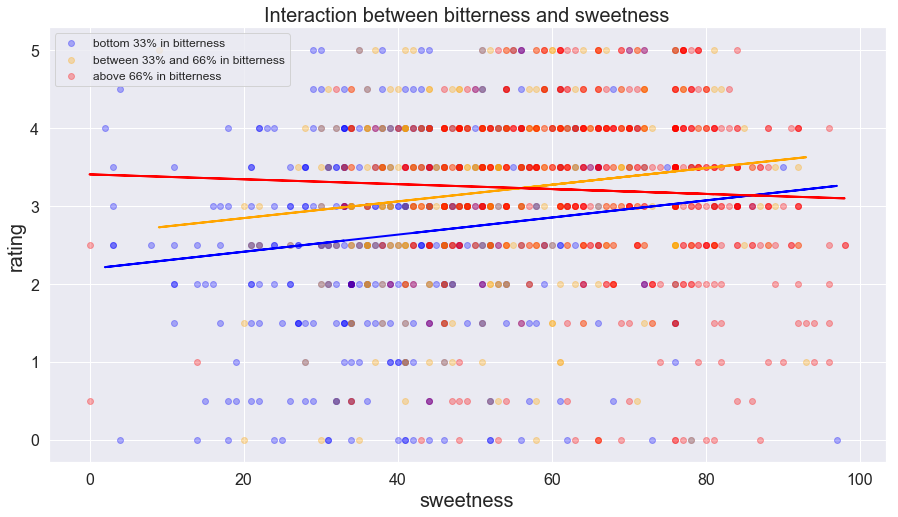

In [16]:
create_interaction('sweetness', 'bitterness')

df_high.shape:  (409, 16)
df_med.shape:  (500, 16)
df_low.shape:  (458, 16)
regression_h.coef_:  [0.03907483]
regression_m.coef_:  [0.07500131]
regression_l.coef_:  [0.05532932]


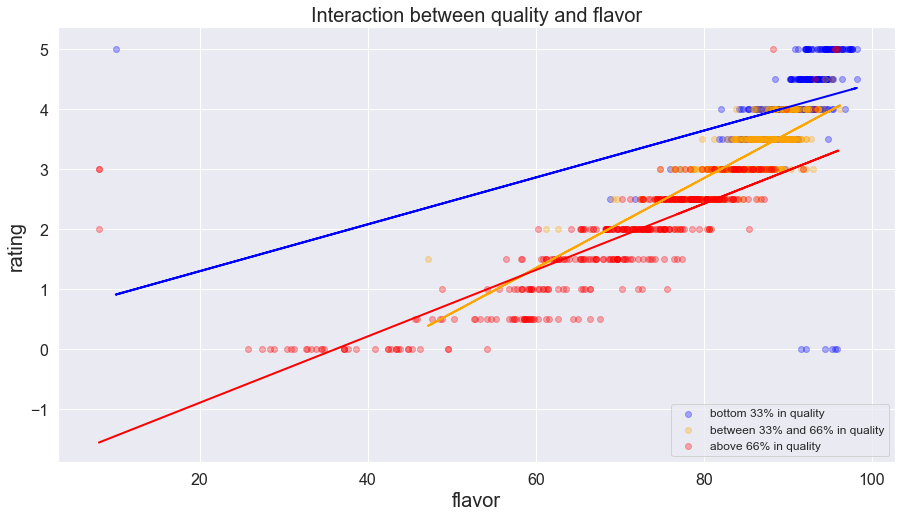

In [17]:
create_interaction('flavor', 'quality')

df_high.shape:  (451, 16)
df_med.shape:  (462, 16)
df_low.shape:  (454, 16)
regression_h.coef_:  [0.06344395]
regression_m.coef_:  [0.06345382]
regression_l.coef_:  [0.06586384]


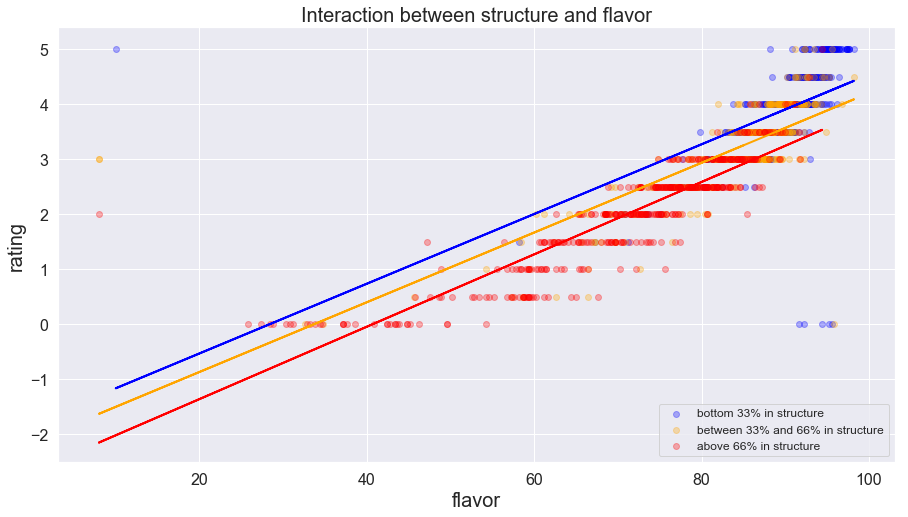

In [18]:
create_interaction('flavor', 'structure')

#### Don't add the interaction between flavor and structure because the relationship looks additive, as in, it doesn't interact

df_high.shape:  (447, 16)
df_med.shape:  (466, 16)
df_low.shape:  (454, 16)
regression_h.coef_:  [0.1065054]
regression_m.coef_:  [0.09868802]
regression_l.coef_:  [0.06115735]


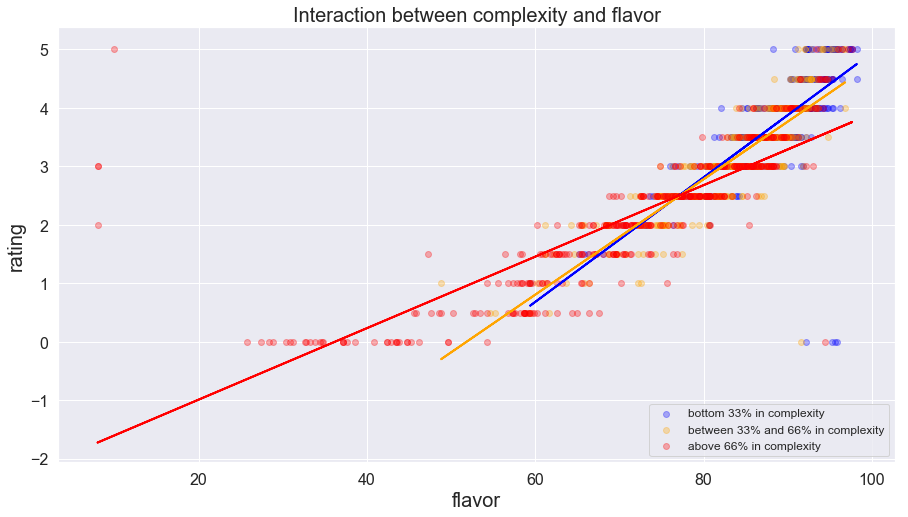

In [19]:
create_interaction('flavor', 'complexity')

df_high.shape:  (451, 16)
df_med.shape:  (462, 16)
df_low.shape:  (454, 16)
regression_h.coef_:  [0.01930116]
regression_m.coef_:  [0.07224173]
regression_l.coef_:  [0.05303774]


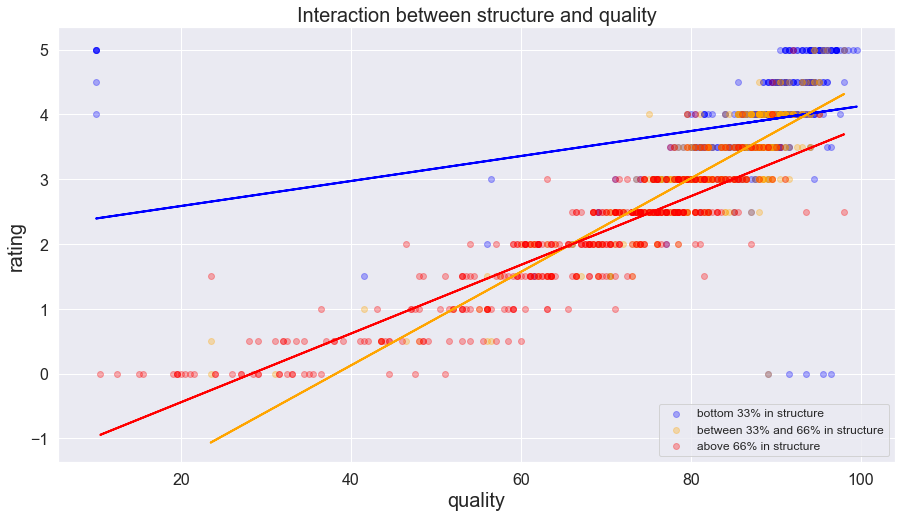

In [20]:
create_interaction('quality', 'structure')

df_high.shape:  (447, 16)
df_med.shape:  (466, 16)
df_low.shape:  (454, 16)
regression_h.coef_:  [0.02880879]
regression_m.coef_:  [0.06553985]
regression_l.coef_:  [0.05854816]


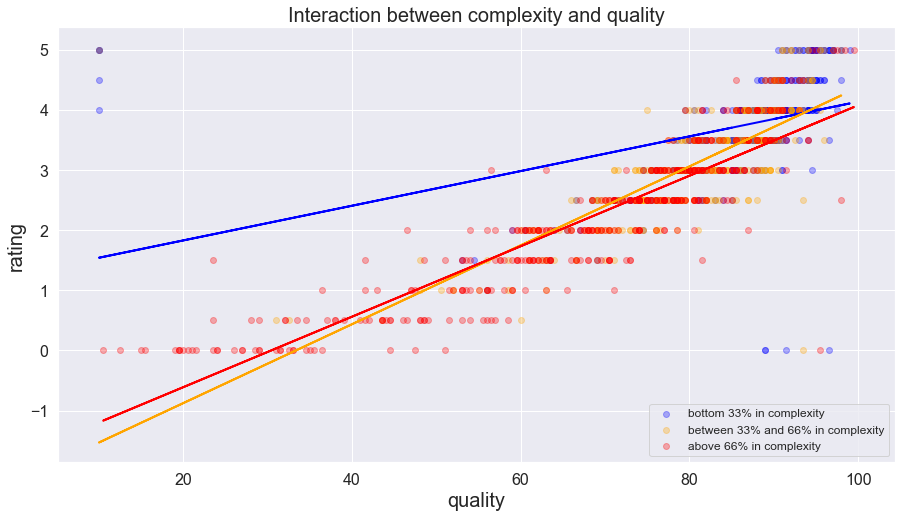

In [21]:
create_interaction('quality', 'complexity')

### Combine Interactions into dataframe

In [22]:
#build another multi-linear regression model to compare with our baseline
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

df_inter = df.copy()
#add the interaction columns
df_inter['bitter_cocoa'] = df_inter['bitterness'] * df_inter['cocoa_perc']
df_inter['sweet_cocoa'] = df_inter['sweetness'] * df_inter['cocoa_perc']
df_inter['sweet_bitter'] = df_inter['sweetness'] * df_inter['bitterness']
df_inter['flavor_quality'] = df_inter['flavor'] * df_inter['quality']
df_inter['flavor_compl'] = df_inter['flavor'] * df_inter['complexity']
df_inter['quality_struc'] = df_inter['quality'] * df_inter['structure']
df_inter['quality_comple'] = df_inter['quality'] * df_inter['complexity']

#seperate X matrix and Y matrix
df_inter.head()
df_inter_Y = df_inter['rating']
df_inter_X = df_inter.loc[:,'cocoa_perc':]

final_model = np.mean(cross_val_score(regression, df_inter_X, df_inter_Y, scoring='r2', cv=crossvalidation))
final_model

0.8675299399434533

baseline = 0.8341048608039572 <br>
R-squared = 0.846 <br>

In [23]:
import statsmodels.api as sm
df_inter_sm = sm.add_constant(df_inter_X)
results = sm.OLS(df_inter_Y, df_inter_sm).fit()
results.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     438.4
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:25:54   Log-Likelihood:                -700.79
No. Observations:                1367   AIC:                             1448.
Df Residuals:                    1344   BIC:                             1568.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.1675      0.396     -5.469      0.000      -2.945      -1.390
cocoa_perc         0.0051      0.004      1.247      0.213      -0.003       0.013
CQ                 0.0015      0.001      2.256      0.024       0.000       0.003
sweetness          0.0033      0.003      1.006      0.314      -0.003       0.010
acidity            0.0004      0.001      0.637      0.524      -0.001       0.002
bitterness         0.0056      0.005      1.162      0.246      -0.004       0.015
roast             -0.0005      0.001     -0.719      0.472      -0.002       0.001
intensity         -0.0013      0.001     -1.636      0.102      -0.003       0.000
complexity        -0.0284      0.005     -5.420      0.000      -0.039      -0.018
structure         -0.0009      0.004     -0.252      0.801      -0.008       0.006
length            -0.0009      0.001     -0.946      0.344      -0.003       0.001
appearance         0.0067      0.001      7.558      0.000       0.005       0.008
aroma              0.0105      0.001      9.255      0.000       0.008       0.013
mouthfeel          0.0163      0.001     12.192      0.000       0.014       0.019
flavor            -0.0271      0.005     -5.330      0.000      -0.037      -0.017
quality            0.0161      0.004      4.402      0.000       0.009       0.023
bitter_cocoa   -6.708e-05   5.25e-05     -1.277      0.202      -0.000    3.59e-05
sweet_cocoa    -3.415e-05   4.79e-05     -0.713      0.476      -0.000    5.98e-05
sweet_bitter    8.989e-07   3.92e-05      0.023      0.982    -7.6e-05    7.78e-05
flavor_quality     0.0004   6.24e-05      6.642      0.000       0.000       0.001
flavor_compl       0.0010   6.56e-05     15.779      0.000       0.001       0.001
quality_struc   6.494e-05   4.47e-05      1.453      0.146   -2.27e-05       0.000
quality_comple    -0.0007   5.21e-05    -13.229      0.000      -0.001      -0.001
==============================================================================
Omnibus:                     1502.099   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           260534.771
Skew:                          -5.063   Prob(JB):                         0.00
Kurtosis:                      69.870   Cond. No.                     4.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
#save new intersected dataframe to csv
df_inter.to_csv('inter_choco_rating.csv', index=False)